In [2]:
import numpy as np
import pandas as pd
from sklearn import neighbors, datasets
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# carregando os dados com numpy
train = pd.read_csv('fitbit.data')
test = pd.read_csv('fitbit.data')
dados = pd.read_csv('fitbit.data', delimiter=',', usecols=(1,2,3))
entradas = pd.read_csv('fitbit.data', delimiter=',', usecols=(1,2))
saidas = np.genfromtxt('fitbit.data', delimiter=',', usecols=(3))
print(len(entradas))
print(len(saidas))

404
405


# DADOS DE ENTRADA DO FITBIT

In [4]:
entradas = entradas.rename({"85": "batimentos", "22": "calorias"}, axis="columns")
dados = dados.rename({"85": "Batimentos", "22": "Calorias", "0.1": "Pressão Arterial"}, axis="columns")


# DADOS DE SAIDAS DO FITBIT

In [5]:
x = dados["Pressão Arterial"]
a1 =[]
y = x.size
i = 0
for i in range( 404 ):
    if x[i] == 0:
        n = "normal"
        a1.append(n)
    elif x[i] == 1:
        n = "alta"
        a1.append(n)
    elif x[i] == 2:
        n = "baixa"
        a1.append(n)


In [6]:
dados['Legenda'] = a1
dados

,Batimentos,Calorias,Pressão Arterial,Legenda
0,86,34,0,normal
1,93,34,0,normal
2,92,13,0,normal
3,94,12,0,normal
4,87,12,0,normal
5,88,12,0,normal
6,80,10,0,normal
7,84,10,0,normal
8,70,11,0,normal
9,63,11,0,normal


# DEFININDO OS VIZINHOS NO KNN
# TREINANDO MEU MODELO KNN|

In [7]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(entradas[0:404], saidas[:404])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

# SAÍDAS DOS RESULTADOS DO KNN

In [8]:
x = knn.predict(entradas)
a = []
y = x.size
i = 0
for i in range( 404 ):
    if x[i] == 0:
        n = "normal"
        a.append(n)
    elif x[i] == 1:
        n = "alta"
        a.append(n)
    elif x[i] == 2:
        n = "baixa"
        a.append(n)

# ACURACIA DOS RESULTADOS

In [9]:
acuracia = knn.score(entradas[:404], saidas[:404])
acuracia

0.8787128712871287

#  87.9% de certeza.

In [10]:
dados['knn Resultado 01'] = a
dados

,Batimentos,Calorias,Pressão Arterial,Legenda,knn Resultado 01
0,86,34,0,normal,normal
1,93,34,0,normal,normal
2,92,13,0,normal,normal
3,94,12,0,normal,alta
4,87,12,0,normal,normal
5,88,12,0,normal,normal
6,80,10,0,normal,normal
7,84,10,0,normal,normal
8,70,11,0,normal,normal
9,63,11,0,normal,normal


# --------------------------------------------------------------------- #

# knn Teste 02

In [11]:
from sklearn.neighbors import KNeighborsClassifier
X_train = entradas
x_train = entradas
y_train = saidas
x_test = entradas
y_test = saidas
X = entradas
y = saidas

In [12]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(x_train[:404], y_train[0:404].ravel())
output = knn.predict(x_test)

In [13]:
a = []
y = x.size
i = 0

#print(knn.predict([x_test[200]]))
#print(y_test[200])

for i in range( 404 ):
    if output[i] == 0:
        n = "normal"
        a.append(n)
    elif output[i] == 1:
        n = "alta"
        a.append(n)
    elif output[i] == 2:
        n = "baixa"
        a.append(n)

In [14]:
correct = 0.0
for i in range(len(output)):
    if y_test[i] == output[i]:
        correct += 1
correct / len(output)

0.905940594059406

# 91% de acerto, houve um aumento significativo usando essa estrutura.

In [15]:
dados['knn Resultado 2'] = a1
dados

,Batimentos,Calorias,Pressão Arterial,Legenda,knn Resultado 01,knn Resultado 2
0,86,34,0,normal,normal,normal
1,93,34,0,normal,normal,normal
2,92,13,0,normal,normal,normal
3,94,12,0,normal,alta,normal
4,87,12,0,normal,normal,normal
5,88,12,0,normal,normal,normal
6,80,10,0,normal,normal,normal
7,84,10,0,normal,normal,normal
8,70,11,0,normal,normal,normal
9,63,11,0,normal,normal,normal


In [16]:
def specie_color(x):
    if x == 'normal':
        return 0
    elif x == 'alta':
        return 1
    return 2

In [17]:
def alerta(x):
    if x == 'alta':
        print('\033[31m'+'Sua pressão parece estar muito alta, procure um médico'+'\033[40m')
    elif x == 'baixa':
        print('\033[46m'+'Sua pressão parece estar muito baixa, procure um médico'+'\033[40m')

In [18]:
def alerta_cuidador(x):
    if x == 'normal':
        return 0
        
    elif x == 'alta':
        return 2
        
    elif x == 'baixa':
        return 1

In [19]:
dados['ALERTAR CUIDADOR'] = dados['knn Resultado 2'].apply(alerta_cuidador)

In [20]:
dados['SpeciesNumber'] = dados['knn Resultado 2'].apply(specie_color)

In [21]:
dados

,Batimentos,Calorias,Pressão Arterial,Legenda,knn Resultado 01,knn Resultado 2,ALERTAR CUIDADOR,SpeciesNumber
0,86,34,0,normal,normal,normal,0,0
1,93,34,0,normal,normal,normal,0,0
2,92,13,0,normal,normal,normal,0,0
3,94,12,0,normal,alta,normal,0,0
4,87,12,0,normal,normal,normal,0,0
5,88,12,0,normal,normal,normal,0,0
6,80,10,0,normal,normal,normal,0,0
7,84,10,0,normal,normal,normal,0,0
8,70,11,0,normal,normal,normal,0,0
9,63,11,0,normal,normal,normal,0,0


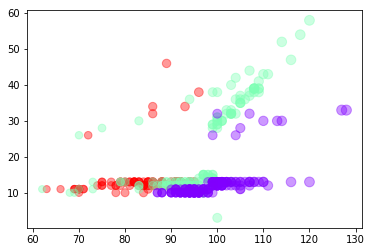

In [22]:

plt.scatter(
    dados['Batimentos'], dados['Calorias'], marker='o', sizes=0.8 * dados['Batimentos'],
    c=dados['SpeciesNumber'], cmap='rainbow_r', alpha=0.4
)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.externals import joblib

In [25]:
joblib.dump(knn, '/knn.pkl')

['/knn.pkl']

In [26]:
import pickle as pickle

In [27]:
pickle.dump(knn, open('/knn.pkl', 'wb'))

In [28]:
my_knn = pickle.load(open('/knn.pkl', 'rb'))

In [29]:
my_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')

In [30]:
import requests, json

ModuleNotFoundError: No module named 'requests'

In [31]:

def legenda(m):
    if m['results'] == '0.0':
        return 0
        
    elif m['results'] == '1.0':
        return 2
        
    elif m['results'] == '2.0':
        return 1

In [32]:
url = "http://localhost:9000/api"
data = json.dumps({'Batimentos':98,'Calorias':55})
lista_resultados = []
r = requests.post(url, data)
m = r.json()

m = m['results'][0]


NameError: name 'json' is not defined

In [33]:
def resultado_knn():
    if m == 0.0:
        print('NORMAL')
    
    elif m == 1.0:
        print('BAIXA')
        
    elif m == 2.0:
        print('ALTA')
    

resultado_knn()

NameError: name 'm' is not defined